# 6. Fourierova transformácia
Fourierova transformácia (FT) je dôležitým nástrojom pri úprave signálov, ktoré rozkladá na
jednotlivé harmonické zložky. Hovoríme o prechode z časovej (rsp. priestorovej) oblasti do
frekvenčnej oblasti. Pre lepšie pochopenie uvedieme najskôr príklad použitia FT na signále šíriacom
sa pozdĺž jedného rozmeru zloženom z dvoch harmonických zložiek:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data, transform, io

from scipy import fft

In [2]:
plt.rcParams['text.color'] = 'w'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'w'

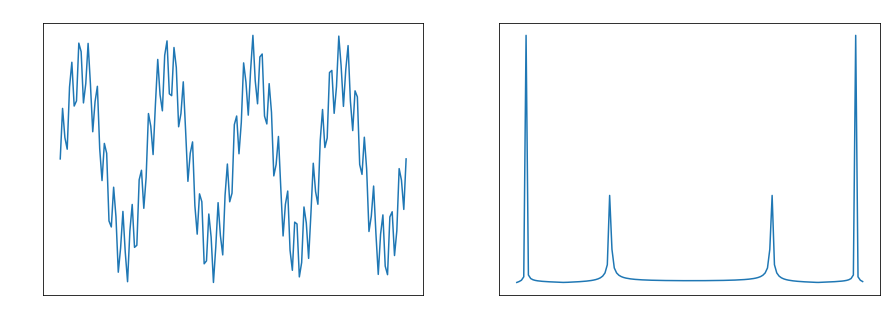

In [15]:
x = np.linspace(0, 8*np.pi, 150)

y_1 = 2*np.sin(x)
y_2 = 0.8*np.sin(10*x)

y = y_1 + y_2

y_f = fft.fft(y)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Funkcia z dvoch sinusov s roznym f a A')
plt.subplot(122)
plt.title('Fourrier transform of the signal')
plt.plot(np.abs(y_f))

Úpravou frekvenčného spektra pred vykonaním inverznej Fourierovej transformácie môžeme zo
signálu odfiltrovať niektoré harmonické zložky:

/home/miro/anaconda3/envs/computer_vision/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'y')

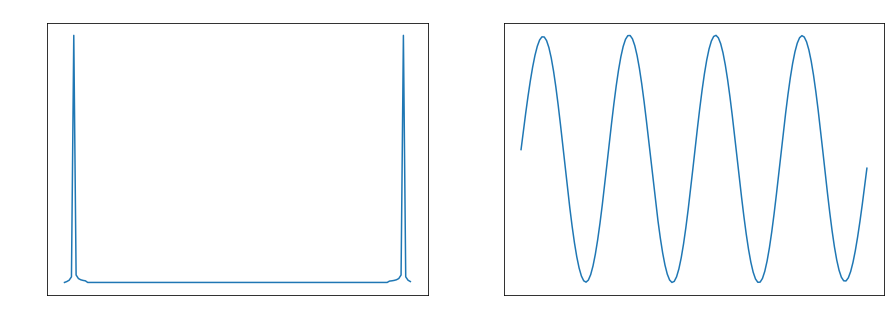

In [14]:
y_f_removed_f = y_f
y_f_removed_f[10:140] = 0  + 0.j
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(np.abs(y_f))
plt.xlabel('y')
plt.ylabel('f')
plt.title('Frekvencne spektrum s jednym odstranenym peakom')
plt.subplot(122)
y_t = fft.ifft(y_f)
plt.plot(x,y_t)
plt.xlabel('x')
plt.ylabel('y')


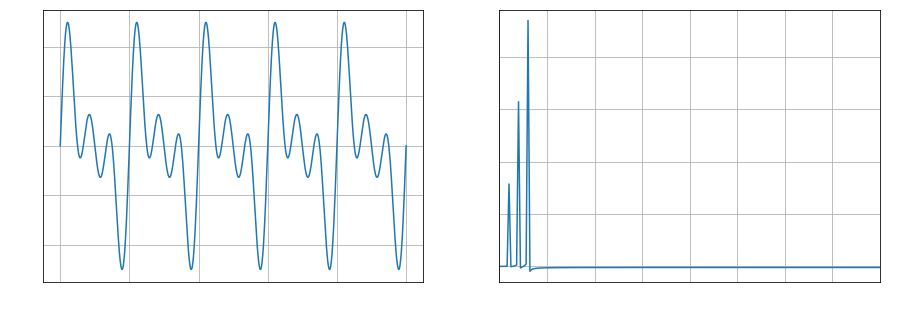

In [16]:
N = 1000
Fs  = 100 # Hz vzorkovacia frekvencia

T = N/Fs

x = np.linspace(0, 10*np.pi, N)

y_1 = np.sin(x) + np.sin(2*x) + np.sin(3*x)

f = np.linspace(0,N-1,N)*Fs/N

plt.figure(figsize=(15,5))
y_f = fft.fft(y_1)

plt.subplot(121)
plt.plot(y_1)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.subplot(122)
plt.plot(f,np.real(y_f))
plt.axis([0,20,np.min(np.real(y_f))-1,np.max(np.real(y_f))+1])
plt.xlabel('Hz')
plt.ylabel('Y*Hz^-1')

plt.grid()

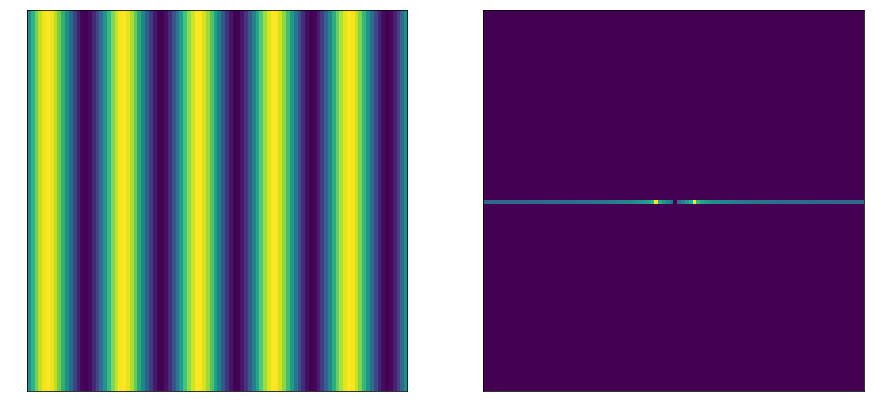

In [20]:
N=100
x = np.array([np.linspace(0,10*np.pi,N)])
y = np.sin(x)
im = np.repeat(y, 100,axis=0)
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(im)
plt.subplot(122)
im_fft= fft.fft2(im)

zero_center_im_fft = fft.fftshift(im_fft)

plt.imshow(np.log(1+np.abs(zero_center_im_fft)))

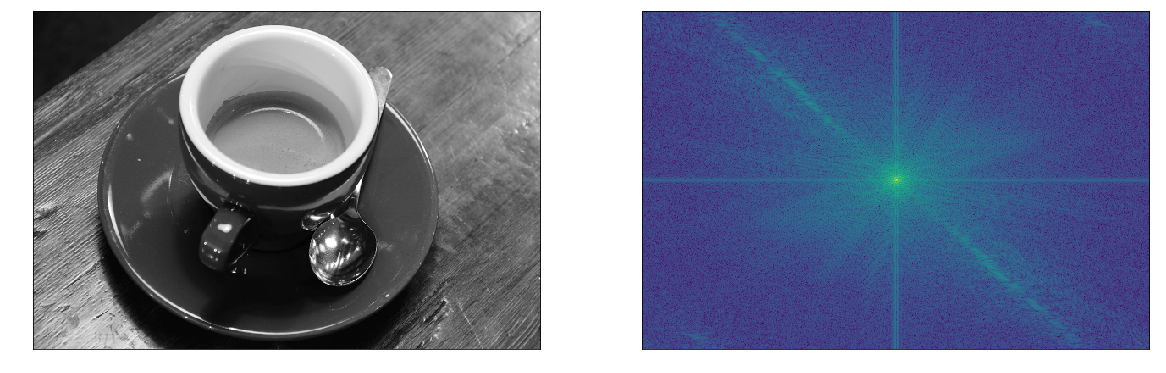

In [21]:
im = rgb2gray(data.coffee())
plt.figure(figsize=(20,15))
plt.subplot(121)
plt.imshow(im,cmap='gray')
plt.subplot(122)
im_fft= fft.fft2(im)
zero_center_im_fft = fft.fftshift(im_fft)
plt.imshow(np.log(1+np.abs(zero_center_im_fft)))

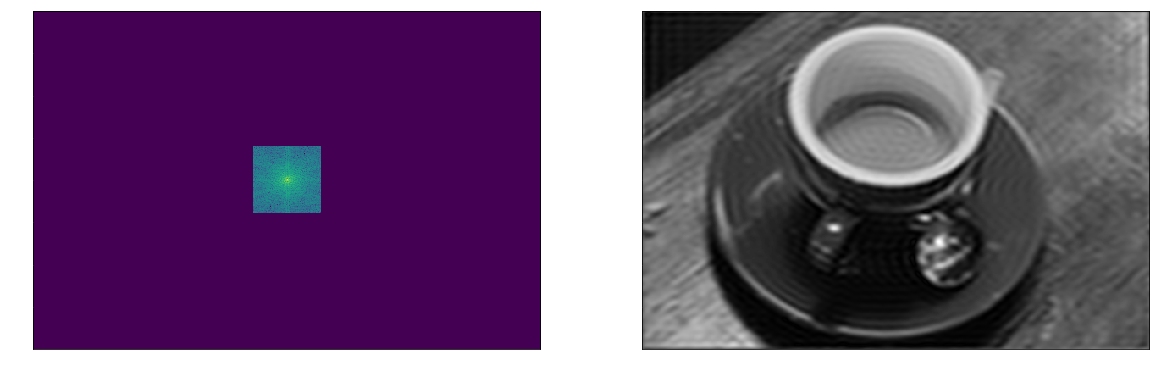

In [22]:
plt.figure(figsize=(20,15))
plt.subplot(121)
pxls = 40

im_fft= fft.fft2(im)
zero_center_im_fft = fft.fftshift(im_fft)
im_size = im.shape
filtered_spectrum = np.zeros(zero_center_im_fft.shape,dtype=np.complex)

filtered_spectrum[im_size[0]//2-pxls:im_size[0]//2+pxls,im_size[1]//2-pxls:im_size[1]//2+pxls] =\
    zero_center_im_fft[im_size[0]//2-pxls:im_size[0]//2+pxls,im_size[1]//2-pxls:im_size[1]//2+pxls]

plt.imshow(np.log(1+np.abs(filtered_spectrum)))
plt.subplot(122)
inverse_img = fft.ifft2(filtered_spectrum)
plt.imshow(np.abs(inverse_img), cmap='gray')

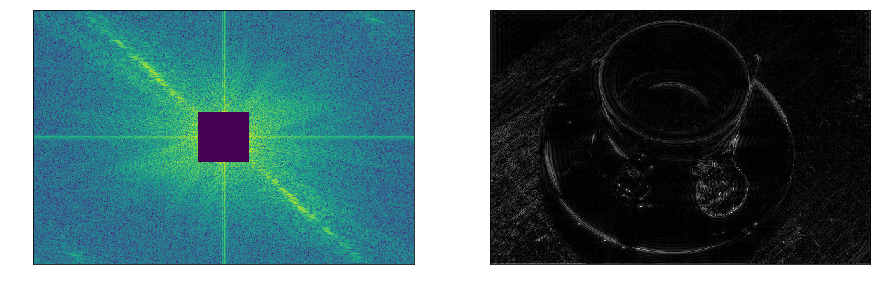

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(121)
pxls = 40

im_fft= fft.fft2(im)
zero_center_im_fft = fft.fftshift(im_fft)
im_size = im.shape
filtered_spectrum = zero_center_im_fft

filtered_spectrum[im_size[0]//2-pxls:im_size[0]//2+pxls,im_size[1]//2-pxls:im_size[1]//2+pxls] = 0+0.j
plt.imshow(np.log(1+np.abs(filtered_spectrum)))
plt.subplot(122)
inverse_img = fft.ifft2(filtered_spectrum)
plt.imshow(np.abs(inverse_img), cmap='gray')

# Dokoncit cvicenie v knihe s obrazkami z knihy
# Dorobit bonusovu ulohu

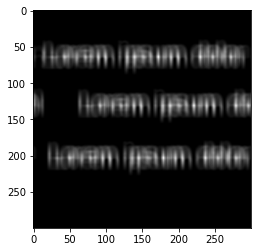

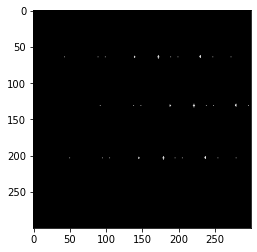

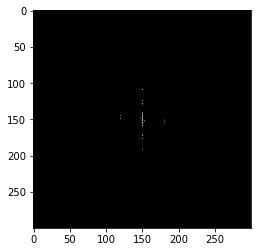

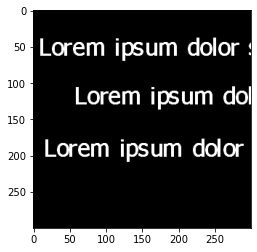

In [45]:
image = io.imread('image_conv.png', as_gray=True)
result = np.zeros(image.shape)
result[0:21, 0:20] = transform.rotate(image[44:65, 153:173], 180)
imageFFT = fft.fft2(image)
image_multiplication = np.real(fft.ifft2( imageFFT * fft.fft2(result) ))
image_multiplication += np.abs(np.min(image_multiplication))
imageFFT = fft.fftshift(imageFFT)
scale = 255/np.max(image_multiplication)
image_multiplication *= scale

plt.figure()
plt.imshow(image_multiplication, cmap = 'gray')
plt.figure()
plt.imshow(image_multiplication > 200, cmap='gray')

plt.figure()
FFT = np.log(1 + np.abs(imageFFT))
plt.imshow(FFT > 0.79*np.max(FFT), cmap='gray')

plt.figure()
plt.imshow(image, cmap = 'gray')
